# Import the dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [7]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(url)
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


# Add the headers and replace the '?' entries with 'NaN' values.

In [8]:
df.columns=['age','gender','bmi','no_of_children','smoker','region','charges']

In [9]:
df.replace('?',np.nan,inplace=True)

In [10]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160


# Task 2 : Data Wrangling

Use `df.info()` to identify the columns that have some 'Null' (or NaN) information.

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


Handle missing data:

For continuous attributes (e.g., age), replace missing values with the mean.
For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
Update the data types of the respective columns.
Verify the update using df.info().

In [12]:
is_smoker = df['smoker'].value_counts().idxmax()
df['smoker'] = df['smoker'].replace(np.nan, is_smoker)

mean_age = df['age'].astype('float').mean(axis=0)
df['age'] = df['age'].replace(np.nan, mean_age)

df[["age", "smoker"]] = df[["age", "smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int64  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int64  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


In [13]:
df['charges']=df['charges'].round(3)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.552
1,28,2,33.000,3,0,4,4449.462
2,33,2,22.705,0,0,1,21984.471
3,32,2,28.880,0,0,1,3866.855
4,31,1,25.740,0,0,4,3756.622


# Task 3 : Exploratory Data Analysis (EDA)

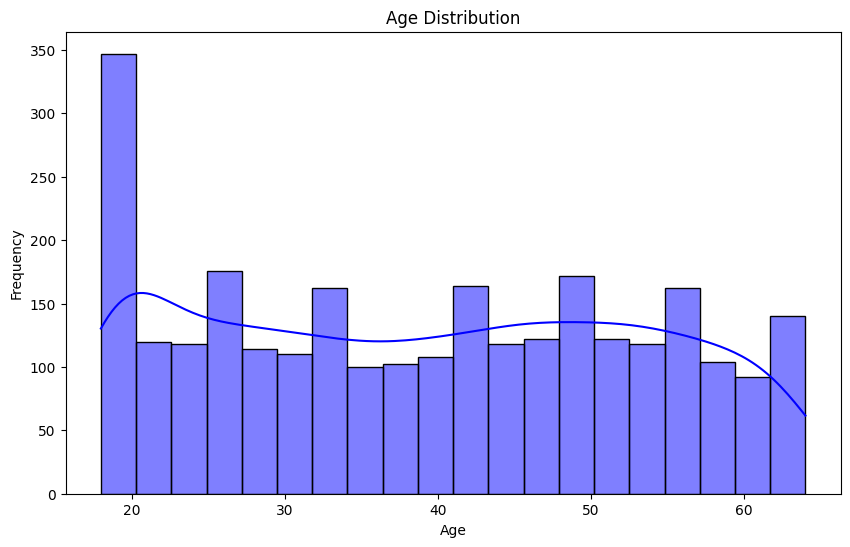

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

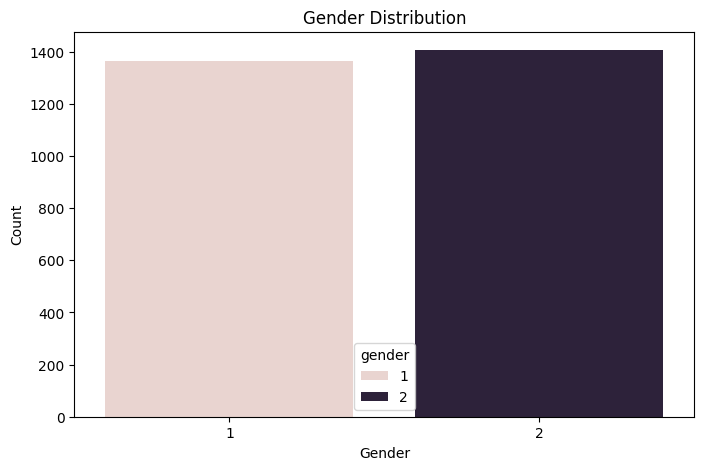

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df, hue='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

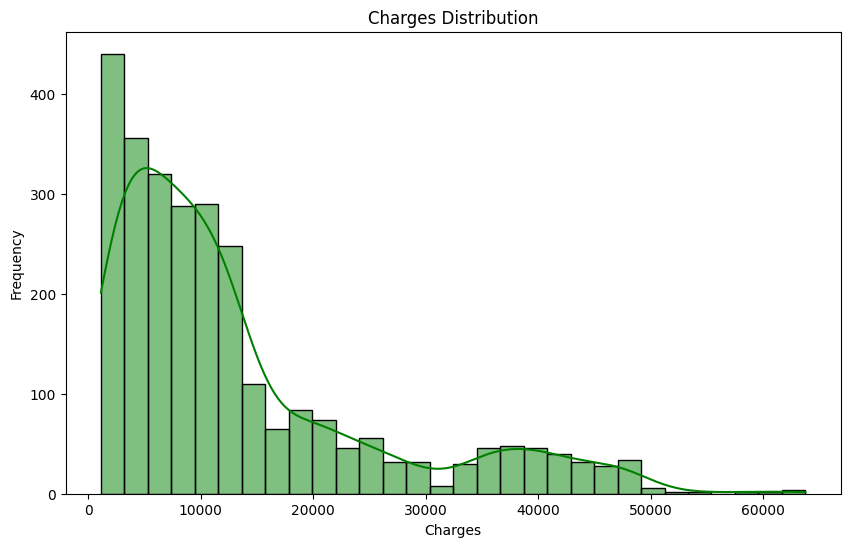

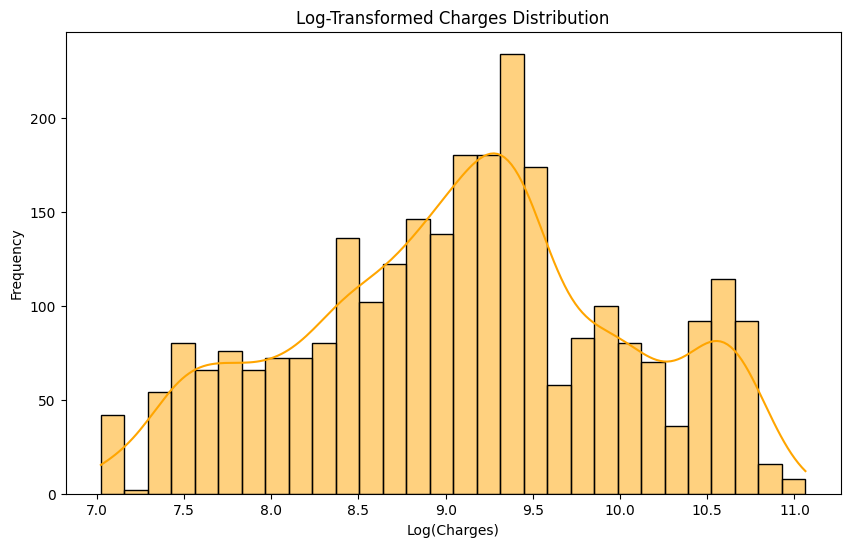

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=30, color='green')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log(df['charges']), kde=True, bins=30, color='orange')
plt.title('Log-Transformed Charges Distribution')
plt.xlabel('Log(Charges)')
plt.ylabel('Frequency')
plt.show()

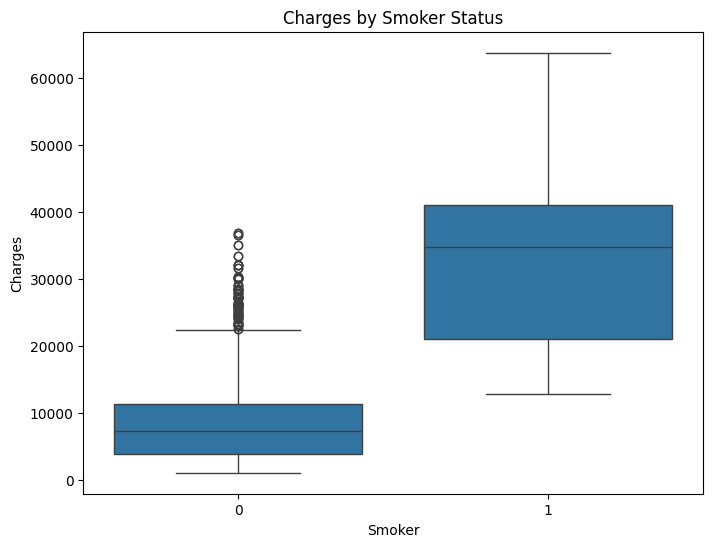

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title('Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

(0.0, 66902.8557)

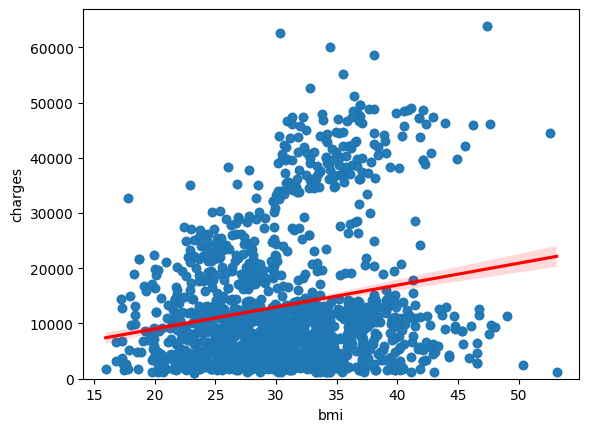

In [19]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

(0.0, 66902.8557)

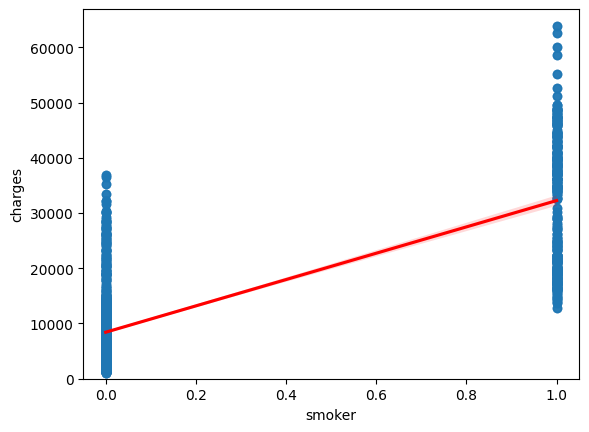

In [20]:
sns.regplot(x="smoker", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

In [21]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


# Task 4 : Model Development

In [22]:
lm=LinearRegression()
X=df[['smoker']]
Y=df['charges']
lm.fit(X,Y)
lm.score(X,Y)

0.6227430384544699

In [23]:
Z = df[['age', 'gender', 'bmi', 'no_of_children','smoker','region']]
lm.fit(Z,Y)
lm.score(Z,Y)

0.7505888658488221

In [24]:
input=[('scale',StandardScaler()),('Polynominal',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(input)
Z=Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
r2_score(Y,ypipe)

0.8453719045910538

# Task 5 : Model Refinement

In [25]:
x_train,x_test,y_train,y_test=train_test_split(Z,Y,test_size=0.2,random_state=1)

In [26]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
r2_score(y_test,yhat)

0.7254198900093881

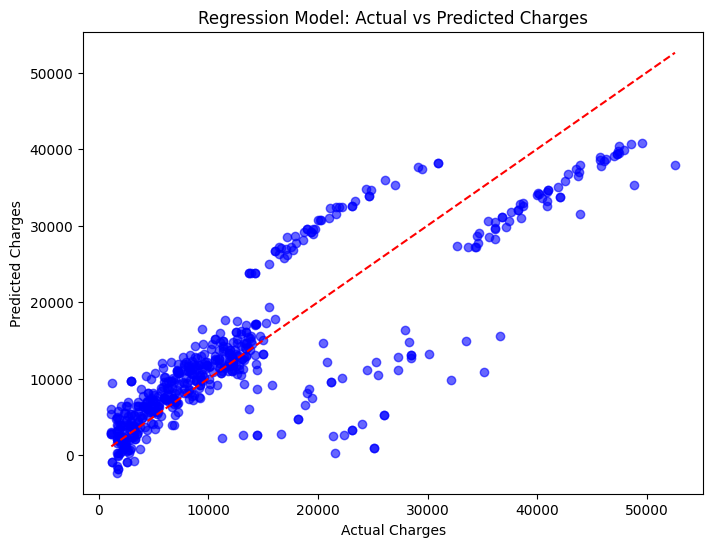

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, yhat, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Regression Model: Actual vs Predicted Charges")

plt.savefig("predicted_vs_actual.png", dpi=300)

plt.show()

